#   **Multimedia systems course | ECE AUTH | Winter semester 2022**
## **Simplified mp3 CODEC**


>   Giachoudis Christos


>   Kostopoulos Andreas Marios


![ logo](mp3.png)

## Necessary imports

In [1]:
# Importing the necessary libraries, files and modules
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import fft
from frame import *
from mp3 import *
import winsound
from codec0 import *

## h coefficients import


In [2]:
h_coeffs = np.load('h.npy', allow_pickle=True).tolist()
print(type(h_coeffs))
h_coeffs = h_coeffs['h'].reshape(-1,)
# print(h_coeffs[4])
# print(h_coeffs)
print(len(h_coeffs))
print(type(h_coeffs))

<class 'dict'>
512
<class 'numpy.ndarray'>


## Import `wav` file

In [3]:
samplerate, data = wavfile.read('./myfile.wav')
print(f"WAV file imported successfully!!! This file has been created with a sample rate of {samplerate} Hz.")

WAV file imported successfully!!! This file has been created with a sample rate of 44100 Hz.


In [6]:
# Only in Windows (sad)
winsound.PlaySound('myfile.wav', winsound.SND_FILENAME)

KeyboardInterrupt: 

In [4]:
# just for testing | at the end we can delete it
print(f"We will work with {type(data)}")

We will work with <class 'numpy.ndarray'>


## **Coder - Decoder**

### 1) Subband filtering

1.1: `H and G computation`

In [5]:
fs = 44100
h = h_coeffs # the standard h coefficients
M = 32 # number of filters
H = make_mp3_analysisfb(h, M) # subband filtering analysis coefficients computation
G = make_mp3_synthesisfb(h, M) # subband filtering synthesis coefficients computation

In [6]:
print(H.shape)

(512, 32)


1.2: `Hs plotting on f frequency(Hz)`

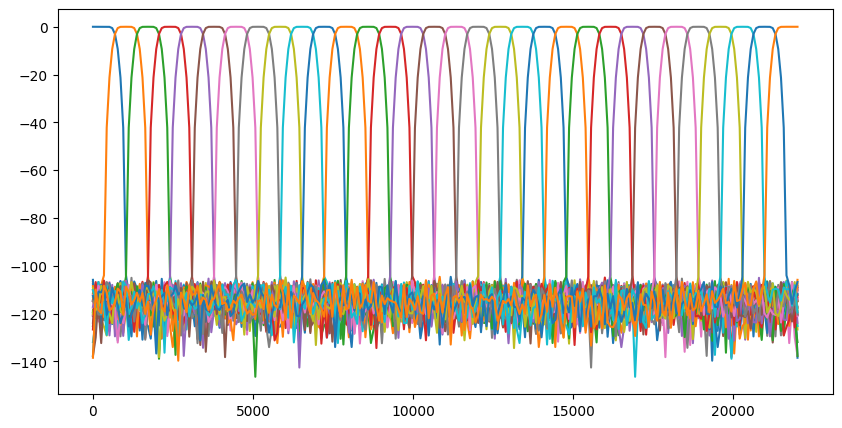

In [7]:
# Preparing the figure
plt.figure(figsize=(10,5))
Hs = np.transpose(H)

# Fourier Transform
fft_h = []
for i in range(M):
    fft_h.append(fft.rfft(Hs[i]))
fft_h_db = 10*np.log10((np.abs(fft_h))**2)

# Fixing the frequency domain
n = 2 * fft_h_db[0].size - 1
timestep = 1/fs

freq = fft.rfftfreq(n, timestep)

# Plotting
for i in range(M):
    plt.plot(freq, fft_h_db[i])

plt.show()

In [8]:
np.shape(freq)

(257,)

1.3: `Hs plotting on z frequency(barks)`

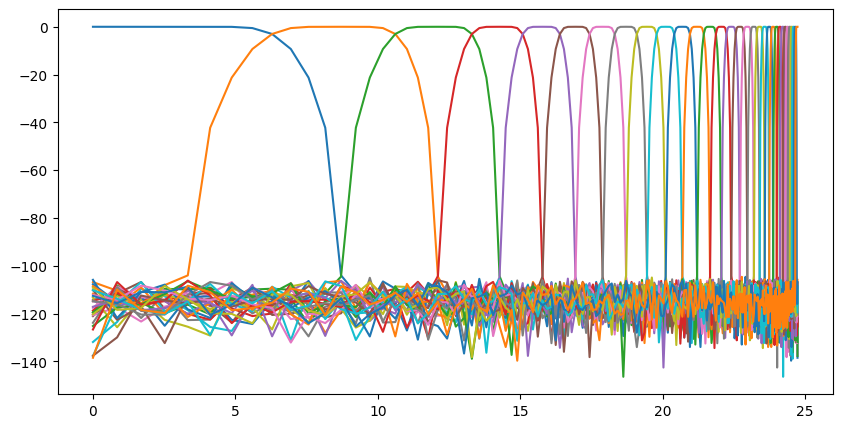

In [9]:
# Bark
# Typical Conversion 
bark = 13*np.arctan(0.00076*freq) + 3.5*np.arctan((freq/7500)**2)

# Traunmuller conversion (same thing)
# bark = ((26.81*freq) / (1960+freq)) - 0.53
# Wang, Sekey & Gersho (not working properly)
# bark = 6 * np.arccosh(freq/600)

# Plotting

# Preparing the figure
plt.figure(figsize=(10,5))
for i in range(M):
    plt.plot((bark), fft_h_db[i])

plt.show()

1.4: `codec0`

In [10]:
M = 32
N = 36
samples = M*N
iterations = (data.size)/samples
print(iterations)

447.0


In [11]:
xhat, Ytot = codec0(data, h, M, N)

iterations: 447.0
Check
Size of x_buffer: (607,)
shape of ind: (1632, 512)
[[    0     1     2 ...   509   510   511]
 [   32    33    34 ...   541   542   543]
 [   64    65    66 ...   573   574   575]
 ...
 [52128 52129 52130 ... 52637 52638 52639]
 [52160 52161 52162 ... 52669 52670 52671]
 [52192 52193 52194 ... 52701 52702 52703]]


IndexError: index 607 is out of bounds for axis 0 with size 607

1.5: `coder0`

1.6: `decoder0`

1.7: `Coding/Decoding`

In [12]:
(N-1)*M + 512

1632

In [13]:
buffer = ((N-1) + 512/M)*M
buffer % (N*M)

480.0

In [14]:
for i in range(1, 5):
    print(i)

1
2
3
4


In [18]:
a = np.array([5, 6, 4, 4, 5, 7, 8, 9, 7, 6, 5, 4, 2, 2, 4,5,5,6,7,7,8,8,7,76,65])
ind = np.array([[1,2,3],[10,21,13],[5,3,7]])
b = a[ind]
print(b)

[[6 4 4]
 [5 8 2]
 [7 4 9]]
